In [1]:
import numpy as np
from prettytable import PrettyTable
import os
import matplotlib.pyplot as plt
import scipy.signal
import scipy.optimize as op
from scipy import special as sp
from scipy import integrate
import plasmapy
from prettytable import PrettyTable
from scipy import fftpack
from scipy.misc import derivative
%config InlineBackend.figure_format = 'svg'

In [2]:
v_th = 1
kappa_p = 2
kappa_n = -10
v_n_lim = v_th*np.sqrt(-kappa_n)

In [3]:
def fm(v):
    r = np.exp(-v**2/v_th**2) / np.sqrt(np.pi) / v_th
    return r
def fk_p(v,kappa_p):
    v_th = np.sqrt(1-1.5/kappa_p)*np.sqrt(2)
    rv = ( 1 + (v/v_th)**2/kappa_p )**(-kappa_p)
    A = 1/np.sqrt(np.pi*kappa_p)/v_th * sp.gamma(kappa_p)/sp.gamma(kappa_p-1/2)
    return A*rv
def fk_n(v):
    rv = ( 1 + (v/v_th)**2/kappa_n )**(-kappa_n)
    A = np.sqrt(np.pi)*v_th*(-kappa_n)**1.5*sp.gamma(-kappa_n)/sp.gamma(1.5-kappa_n)
    return A*rv
def Dfm(v):
    return derivative(fm, v, dx=1e-6)
def Dfk_p(v):
    return derivative(fk_p, v, dx=1e-6)
def Dfk_n(v):
    return derivative(fk_n, v, dx=1e-6)

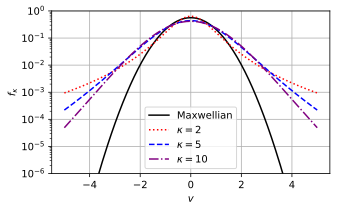

In [4]:
v = np.linspace(-5,5,num=200)
v_n = np.linspace(-v_n_lim,v_n_lim,num=200)

fig = plt.figure(figsize=(5,3))
ax1 = plt.subplot(111)
ax1.plot(v,fm(v),'-',color='black',label='Maxwellian')
ax1.plot(v,fk_p(v,2),':',color='red',label='$\kappa=2$')
ax1.plot(v,fk_p(v,5),'--',color='blue',label='$\kappa=5$')
ax1.plot(v,fk_p(v,10),'-.',color='purple',label='$\kappa=10$')
# ax1.plot(v_n,fk_n(v_n),color='blue')
ax1.set_yscale('log')
ax1.set_ylim(1e-6,1e0)
ax1.set_ylabel('$f_\kappa$')
ax1.set_xlabel('$v$')
ax1.legend()
ax1.grid()

# ax2 = plt.subplot(122)
# ax2.plot(v,Dfm(v),color='black')
# ax2.plot(v,Dfk_p(v),color='red')
# ax2.plot(v_n,Dfk_n(v_n),color='blue')
# ax2.grid()
# plt.savefig('./comparison.pdf',bbox_inches = 'tight')
plt.show()

In [12]:
x=0.2
vmax=20
x*fk_p(vmax,1.6)+(1-x)*fk_p(vmax,2)

4.405201286895392e-06